In [1]:
import numpy as np
import pandas as pd
from numpy.random import multivariate_normal as mvn

import matplotlib.pyplot as plt

# Load data from https://www.openml.org/d/554
from sklearn.datasets import fetch_openml

/Users/erikallen/.virtualenvs/generative-models/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
class BayesClassifier:
    def fit(self, X, Y):

        # List of all digit options
        self.K = list(set(Y))

        self.gaussians = {}

        for k in self.K:
            Xk   = X[Y == k]         # We get all the Xi of class k
            mean = Xk.mean(axis=0)   # We compute their mean
            cov  = np.cov(Xk.T)      # We compute their covariance

            self.gaussians[k] = {
                "m": mean,
                "c": cov
            }

    def sample_given_y(self, y):
        g = self.gaussians[y]
        return mvn(mean=g["m"], cov=g["c"], tol=1e-12)

    def sample(self):
        y = np.random.choice(self.K)
        return self.sample_given_y(y)

In [3]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)
Y = np.array([int(o) for o in Y])
X = X[Y==2]
Y = Y[Y==2]

In [4]:
clf = BayesClassifier()
clf.fit(X, Y)

In [10]:
# sample 44 new points from the data
new_data = []
for i in range(44):
    new_data.append(clf.sample_given_y(2))
new_data = np.asarray(new_data).reshape((4, 11, -1))
# Get real examples of a "2"
real_data = X[:44].reshape((4, 11, -1))

/Users/erikallen/.virtualenvs/generative-models/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: covariance is not positive-semidefinite.


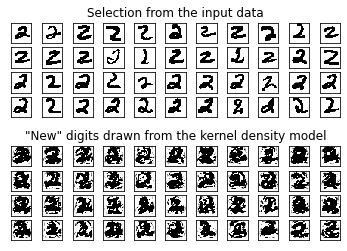

In [11]:
# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((28, 28)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((28, 28)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

In [17]:
print(clf.gaussians[2]['c'])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
